In [1]:
# 1.1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1.2 Load Dataset
df = pd.read_csv('/content/imports-from-asian-countries.csv')
df.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,0,2015-01-01,Afghanistan,AFG,4.0,Asia,142.0,Southern Asia,34.0,7133100.0,"*Beans Of The Spp Vigna Mungo,Hepper Or Vigna ...",Kgs,73.00,56.30,0.09
1,1,2015-01-01,Afghanistan,AFG,4.0,Asia,142.0,Southern Asia,34.0,7133990.0,Other Dried Leguminus Vegetables,Kgs,48.00,33.73,0.05
2,2,2015-01-01,Afghanistan,AFG,4.0,Asia,142.0,Southern Asia,34.0,7136000.0,Pigeon Peas (Cajanus Cajan),Kgs,96.00,49.14,0.08
3,3,2015-01-01,Afghanistan,AFG,4.0,Asia,142.0,Southern Asia,34.0,8021100.0,Almonds Frsh Or Driedin Shell,Kgs,45.80,110.61,0.18
4,4,2015-01-01,Afghanistan,AFG,4.0,Asia,142.0,Southern Asia,34.0,8021200.0,Shelled Almonds Frsh Or Dried,Kgs,190.61,796.56,1.28


In [3]:
# 1.3 Basic Information
print("Shape of dataset:", df.shape)
print("\nData types and info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of dataset: (730248, 15)

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730248 entries, 0 to 730247
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               730248 non-null  int64  
 1   date             730247 non-null  object 
 2   country_name     730247 non-null  object 
 3   alpha_3_code     730247 non-null  object 
 4   country_code     730247 non-null  float64
 5   region           730247 non-null  object 
 6   region_code      730247 non-null  float64
 7   sub_region       730247 non-null  object 
 8   sub_region_code  730247 non-null  float64
 9   hs_code          730247 non-null  float64
 10  commodity        730247 non-null  object 
 11  unit             730247 non-null  object 
 12  value_qt         730247 non-null  float64
 13  value_rs         730247 non-null  float64
 14  value_dl         730247 non-null  float64
dtypes: float64(7), int64(1), object(

In [5]:
# Drop the single row with missing data
df.dropna(inplace=True)
print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (730247, 15)


In [6]:
# Check and drop duplicates
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [7]:
# Optional but good practice
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['id', 'date', 'country_name', 'alpha_3_code', 'country_code', 'region',
       'region_code', 'sub_region', 'sub_region_code', 'hs_code', 'commodity',
       'unit', 'value_qt', 'value_rs', 'value_dl'],
      dtype='object')

In [8]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
# Confirm everything is good
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 730247 entries, 0 to 730246
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               730247 non-null  int64         
 1   date             730247 non-null  datetime64[ns]
 2   country_name     730247 non-null  object        
 3   alpha_3_code     730247 non-null  object        
 4   country_code     730247 non-null  float64       
 5   region           730247 non-null  object        
 6   region_code      730247 non-null  float64       
 7   sub_region       730247 non-null  object        
 8   sub_region_code  730247 non-null  float64       
 9   hs_code          730247 non-null  float64       
 10  commodity        730247 non-null  object        
 11  unit             730247 non-null  object        
 12  value_qt         730247 non-null  float64       
 13  value_rs         730247 non-null  float64       
 14  value_dl         730247 n

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
count,730247.000000,730247,730247,730247,730247.000000,730247,730247.0,730247,730247.000000,7.302470e+05,730247,730247,7.302470e+05,7.302470e+05,730247.000000
unique,NaN,NaN,49,49,NaN,1,NaN,5,NaN,NaN,8638,16,NaN,NaN,NaN
top,NaN,NaN,China,CHN,NaN,Asia,NaN,Eastern Asia,NaN,NaN,Others,Kgs,NaN,NaN,NaN
freq,NaN,NaN,166013,166013,NaN,730247,NaN,398015,NaN,NaN,54125,461341,NaN,NaN,NaN
mean,365123.000000,2016-05-06 07:51:19.685092608,NaN,NaN,406.985228,NaN,142.0,NaN,46.295677,6.325413e+07,NaN,NaN,7.802115e+02,5.546037e+02,0.846575
min,0.000000,2015-01-01 00:00:00,NaN,NaN,4.000000,NaN,142.0,NaN,30.000000,1.012910e+06,NaN,NaN,0.000000e+00,6.000000e-02,0.000000
25%,182561.500000,2015-09-01 00:00:00,NaN,NaN,156.000000,NaN,142.0,NaN,30.000000,3.926203e+07,NaN,NaN,1.400000e-01,3.320000e+00,0.010000
50%,365123.000000,2016-05-01 00:00:00,NaN,NaN,392.000000,NaN,142.0,NaN,30.000000,7.114191e+07,NaN,NaN,2.340000e+00,2.096000e+01,0.030000
75%,547684.500000,2017-01-01 00:00:00,NaN,NaN,682.000000,NaN,142.0,NaN,35.000000,8.473500e+07,NaN,NaN,3.274000e+01,1.159000e+02,0.180000
max,730246.000000,2017-10-01 00:00:00,NaN,NaN,887.000000,NaN,142.0,NaN,145.000000,9.805900e+07,NaN,NaN,1.818343e+06,1.036776e+06,1629.260000


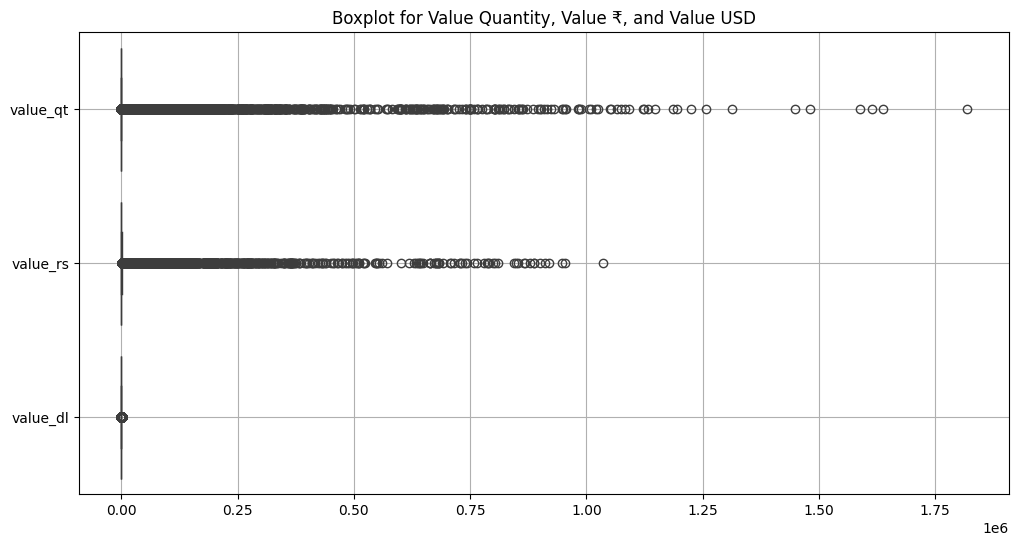

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for key numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['value_qt', 'value_rs', 'value_dl']], orient='h')
plt.title("Boxplot for Value Quantity, Value ₹, and Value USD")
plt.grid(True)
plt.show()

In [16]:
# IQR method to detect outliers
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return col, len(outliers), round(100 * len(outliers) / len(df), 2)

# Check for each column
for column in ['value_qt', 'value_rs', 'value_dl']:
    name, count, perc = count_outliers(column)
    print(f"{name}: {count} outliers ({perc}%)")

value_qt: 126012 outliers (17.26%)
value_rs: 108954 outliers (14.92%)
value_dl: 108900 outliers (14.91%)


In [10]:
df[['value_qt', 'value_rs', 'value_dl']].describe()

,value_qt,value_rs,value_dl
count,7.302470e+05,7.302470e+05,730247.000000
mean,7.802115e+02,5.546037e+02,0.846575
std,1.479018e+04,9.269539e+03,14.177781
min,0.000000e+00,6.000000e-02,0.000000
25%,1.400000e-01,3.320000e+00,0.010000
50%,2.340000e+00,2.096000e+01,0.030000
75%,3.274000e+01,1.159000e+02,0.180000
max,1.818343e+06,1.036776e+06,1629.260000


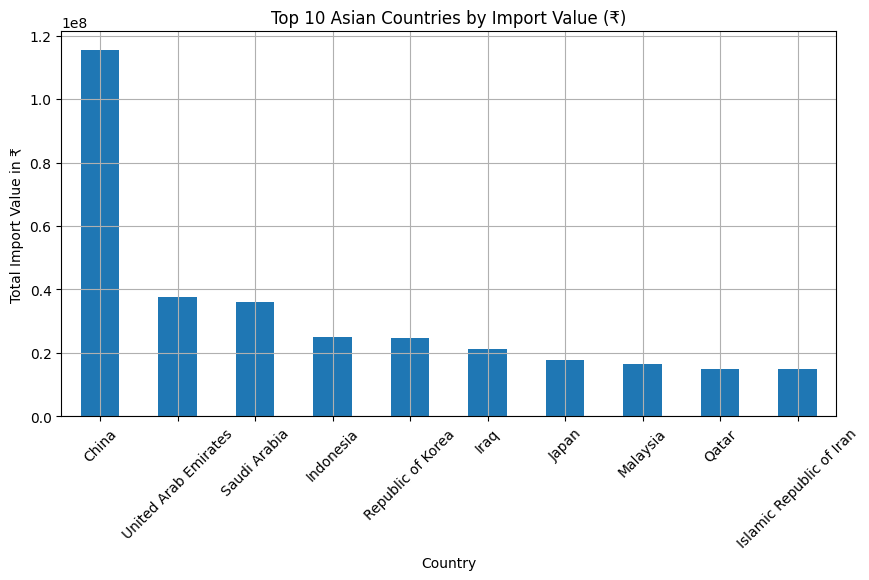

In [11]:
top_countries = df.groupby('country_name')['value_rs'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10, 5), title='Top 10 Asian Countries by Import Value (₹)')
plt.ylabel('Total Import Value in ₹')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

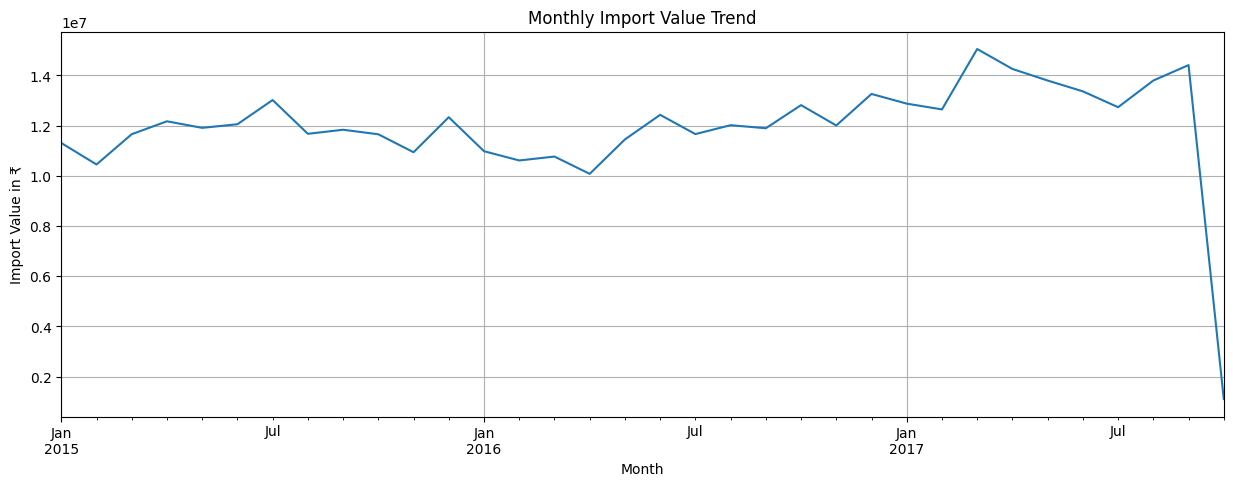

In [12]:
monthly_import = df.groupby(df['date'].dt.to_period('M'))['value_rs'].sum()
monthly_import.index = monthly_import.index.to_timestamp()
monthly_import.plot(figsize=(15, 5), title='Monthly Import Value Trend')
plt.ylabel('Import Value in ₹')
plt.xlabel('Month')
plt.grid(True)
plt.show()

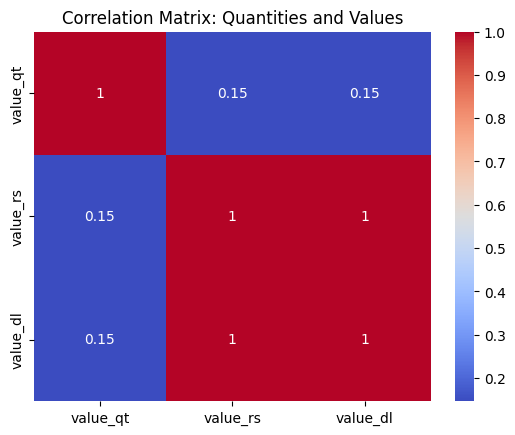

In [13]:
import seaborn as sns
sns.heatmap(df[['value_qt', 'value_rs', 'value_dl']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Quantities and Values')
plt.show()

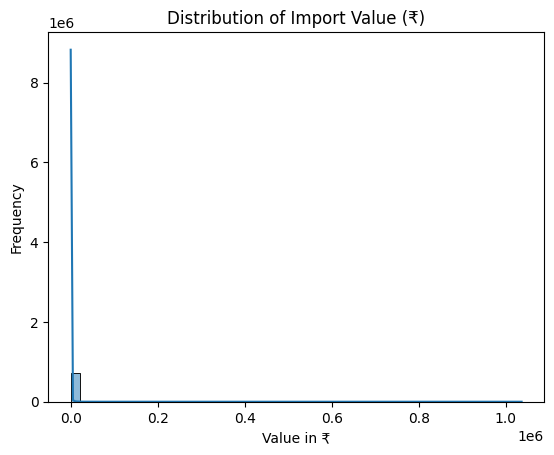

In [14]:
sns.histplot(df['value_rs'], bins=50, kde=True)
plt.title('Distribution of Import Value (₹)')
plt.xlabel('Value in ₹')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.to_csv('/content/cleaned_imports_from_asian_countries.csv', index=False)